<a href="https://colab.research.google.com/github/nluiscuadros24/web-scrapper-twitter/blob/main/sentiment_analisis_tw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tweepy

In [ ]:
pip install emoji

     |████████████████████████████████| 51kB 3.7MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49716 sha256=7b5fb084de9abb23f4f18ea5df46663b077e442abff08f6b302087372d10098e
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [ ]:
from time import sleep
import csv 
import emoji
from datetime import datetime
from textblob import TextBlob 
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
consumer_key = 'N1c0WJXFO6VnFAMTKKZqnLyXh'
consumer_secret = 'Gbxc1lJj2TLWjCGxZm57bwWSj0cionOdeURNcLUfYIDtFz39sO'
access_token = '1281331699700375557-QaKousrW9dfoi38izeRCY4gIzttPES'
access_token_secret = 'zFN4MO41NP3W9vAZbmCe6kPFyyBGU8GGRd2cFDOj3WjJC'

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
print(api.me().name)

Luis


In [ ]:
palabra = input("Buscar: ")

Buscar: violencia


In [ ]:
numero_de_Tweets = int(input(u"Número de tweets a capturar: "))

Número de tweets a capturar: 100


In [ ]:
lenguaje = input("Idioma [es/en]:")

Idioma [es/en]:es


In [ ]:
def ObtenerTweets(palabra="ecologista",times=100,leguanje="es"):
    #Se define las listas que capturan la popularidad
    popularidad_list = []
    numeros_list = []
    numero = 1
    for tweet in tweepy.Cursor(api.search, palabra, lang=lenguaje).items(numero_de_Tweets):
        try:
            #Se toma el texto, se hace el analisis de sentimiento
            #y se agrega el resultado a las listas
            analisis = TextBlob(tweet.text)
            analisis = analisis.sentiment
            popularidad = analisis.polarity
            popularidad_list.append(popularidad)
            numeros_list.append(numero)
            numero = numero + 1

        except tweepy.TweepError as e:
            print(e.reason)

        except StopIteration:
            break
    return (numeros_list,popularidad_list,numero)

with open('test2.csv', 'w', newline='', encoding='utf-8') as file:
  writer = csv.writer(file)
  writer.writerow(["Date", "Day", "Tweet", "Retweets", "Likes"])





In [ ]:
def GraficarDatos(numeros_list,popularidad_list,numero):
    axes = plt.gca()
    axes.set_ylim([-1, 2])
    
    plt.scatter(numeros_list, popularidad_list)
    popularidadPromedio = (sum(popularidad_list))/(len(popularidad_list))
    popularidadPromedio = "{0:.0f}%".format(popularidadPromedio * 100)
    time  = datetime.now().strftime("A : %H:%M\n El: %m-%d-%y")
    plt.text(0, 1.25, 
             "Sentimiento promedio:  " + str(popularidadPromedio) + "\n" + time, 
             fontsize=12, 
             bbox = dict(facecolor='none', 
                         edgecolor='black', 
                         boxstyle='square, pad = 1'))
    
    plt.title("Sentimientos sobre " + palabra + " en twitter")
    plt.xlabel("Numero de tweets")
    plt.ylabel("Sentimiento")
    plt.show()
    

In [ ]:
numeros_list,popularidad_list,numero = ObtenerTweets(palabra,numero_de_Tweets,lenguaje)

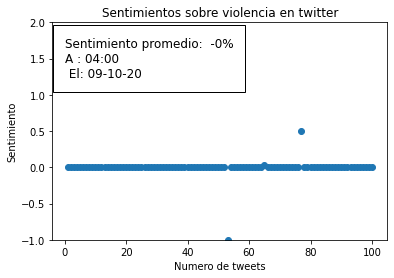

In [ ]:
GraficarDatos(numeros_list,popularidad_list,numero)

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", colormap="Dark2",
                      max_font_size=150, random_state=42).generate(ObtenerTweets)



plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WWcode DataPY2020")
plt.show()

TypeError: ignored